In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [32]:
music_data = pd.read_csv('spotify2023.csv', encoding = 'latin-1')

In [33]:
music_data
music_data.shape

(953, 24)

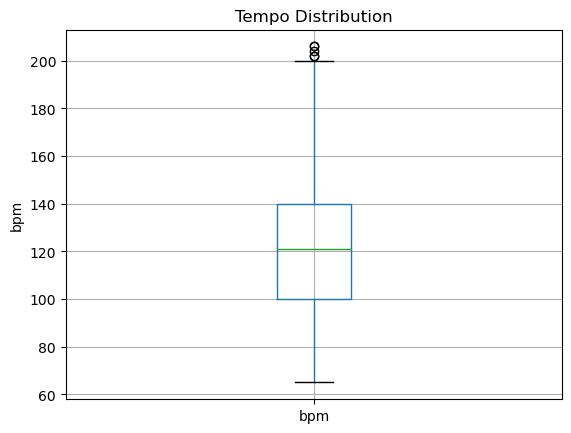

In [34]:
music_data.boxplot(column='bpm')
plt.title('Tempo Distribution')
plt.ylabel('bpm')
plt.show()

In [35]:
music_data.sort_values(by = 'bpm', ascending = False)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
100,Lover,Taylor Swift,1,2012,1,1,8448,23,882831184,160,110,163,0,5,206,G,Major,43,50,55,50,0,15,10
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,11,19,2785,0,432719968,95,89,44,0,NaN,206,NaN,Minor,58,83,45,36,0,11,8
28,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,107,15,1,325,204,F#,Major,52,52,68,46,0,15,4
244,Until I Found You,Stephen Sanchez,1,2021,9,1,4427,4,726434358,69,100,154,20,438,202,A#,Major,34,25,51,69,0,18,4
447,It's the Most Wonderful Time of the Year,Andy Williams,1,1963,10,14,8879,0,663832097,182,107,160,0,1,202,G,Major,24,76,60,77,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,"Residente: Bzrp Music Sessions, Vol. 49","Residente, Bizarrap",2,2022,3,3,461,0,94616487,7,11,13,0,0,71,C#,Minor,59,70,74,56,0,11,40
717,Bohemian Rhapsody - Remastered 2011,Queen,1,1975,10,31,40112,3,2197010679,321,162,"5,691",8,17,71,NaN,Minor,41,23,40,27,0,30,5
49,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,518745108,87,86,74,1,16,67,C#,Minor,53,50,53,23,0,44,7
531,Happier Than Ever,Billie Eilish,1,2021,7,30,8476,0,1056760045,138,133,283,0,NaN,65,NaN,Major,31,31,24,76,0,14,4


In [36]:
fig_parallel = px.parallel_coordinates(music_data, dimensions=['danceability_%', 'valence_%', 'energy_%',
                                                      'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
                                     color='in_spotify_playlists',
                                     title='Audio Features Comparison')
fig_parallel.show()

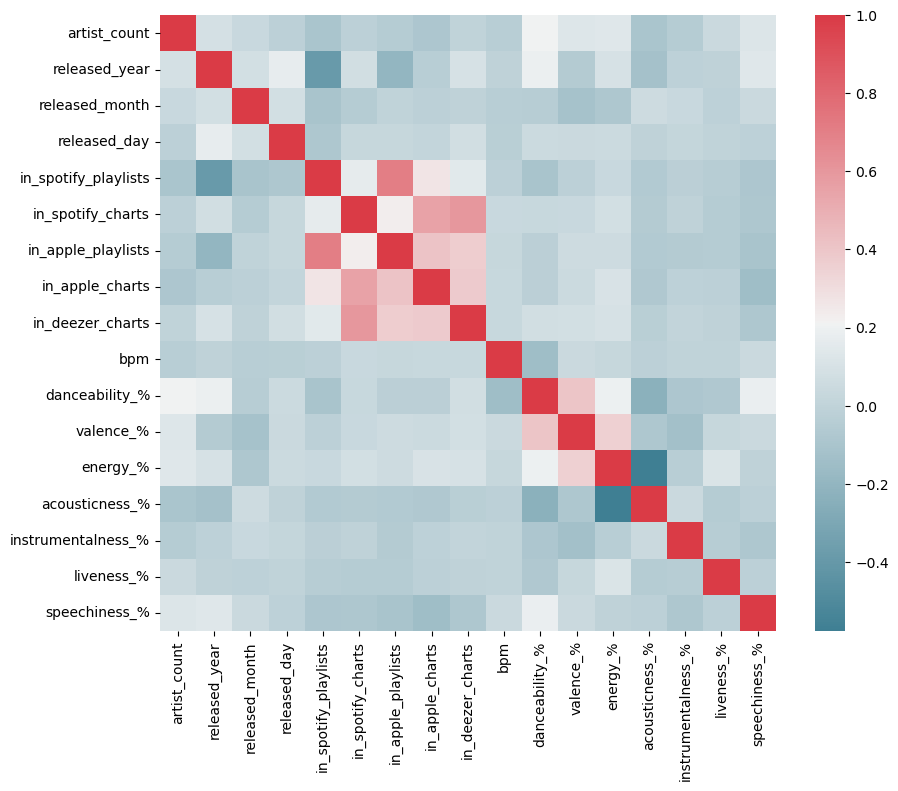

In [37]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize= (10, 8))

corr = music_data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype= bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax= ax)
plt.show()

In [38]:
music_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [39]:
missing_values = music_data.isnull().sum()

# Display columns with missing values, if any
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [40]:
music_data.drop(['in_shazam_charts', 'key'], axis = 1, inplace = True)

In [41]:
music_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,97,Major,82,67,77,8,0,12,5


In [43]:
numerical_features = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists',
    'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts'
]

scaled_data = music_data.copy()
scaled_data[numerical_features] = scaler.fit_transform(music_data[numerical_features])

scaler = StandardScaler()

scaled_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,-0.588731,6.899341,141381703,-0.287191,4.171462,45,10,0.087708,Major,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829
1,LALA,Myke Towers,1,2023,3,23,-0.472052,1.839470,133716286,-0.229318,1.464149,58,14,-1.089053,Major,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829
2,vampire,Olivia Rodrigo,1,2023,6,30,-0.481807,5.161607,140003974,0.303113,3.064823,91,14,0.551280,Major,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966
3,Cruel Summer,Taylor Swift,1,2019,8,23,0.336718,4.497180,800840817,0.557754,3.064823,125,12,1.692382,Major,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,-0.261878,1.941690,303236322,0.187368,1.602478,87,15,0.765237,Minor,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,-0.538056,-0.613800,91473363,-0.078848,-0.768891,37,1,0.765237,Major,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,-0.509298,-0.613800,121871870,-0.738600,-1.025789,8,0,1.549744,Major,-1.707562,-1.893245,-2.434984,2.153081,-0.069161,-0.453371,-0.416966
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,-0.586197,-0.613800,73513683,-0.761749,-1.025789,7,0,-1.089053,Major,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,-0.491562,-0.613800,133895612,-0.449235,-0.511993,17,0,-0.910756,Major,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897


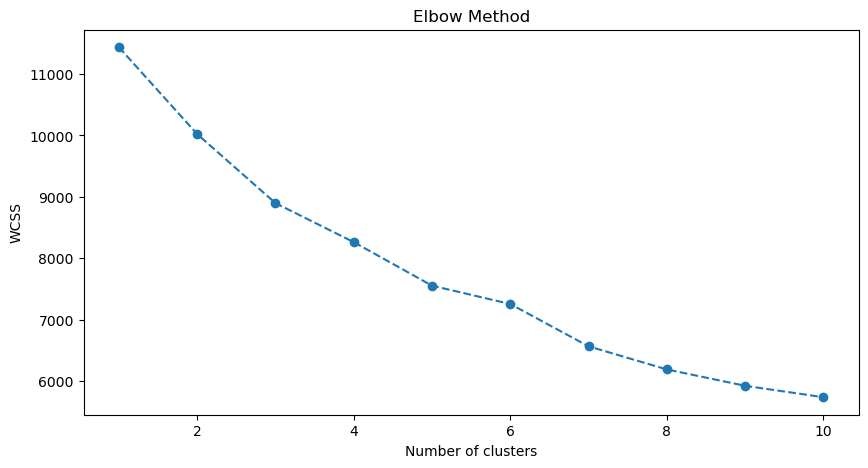

In [49]:
features_for_clustering = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists',
    'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts'
]

X = scaled_data[features_for_clustering]
X


wcss = []  # within-cluster sum of squares


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# Apply k-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
scaled_data['cluster'] = kmeans.fit_predict(X)

# Summary statistics for each cluster
cluster_summary = scaled_data.groupby('cluster').mean()

# Display the cluster summary
cluster_summary.transpose()

cluster,0,1,2,3,4,5,6
artist_count,1.514019,1.757895,1.432692,1.228758,1.415385,1.411765,1.847458
released_year,2020.616822,2019.049123,2018.971154,2015.477124,2009.446154,2015.823529,2021.601695
released_month,5.700935,6.000000,5.980769,6.575163,5.184615,6.529412,6.203390
released_day,14.560748,15.231579,13.331731,13.026144,12.169231,14.823529,13.288136
in_spotify_playlists,0.013620,-0.246531,-0.194510,-0.155137,2.768191,-0.205331,-0.368167
in_spotify_charts,1.945511,-0.253521,-0.311073,-0.351904,0.277869,-0.111722,-0.284185
in_apple_playlists,0.269039,-0.185537,-0.252801,-0.248684,2.537900,-0.285829,-0.384594
in_apple_charts,1.459531,-0.271805,-0.163033,-0.311925,0.930286,0.040164,-0.493404
in_deezer_charts,10.570093,1.842105,1.004808,1.183007,4.523077,3.117647,1.254237
bpm,0.034052,-0.313930,0.535508,-0.197567,-0.091686,0.007999,0.088917


In [54]:
scaled_data[scaled_data['artist(s)_name'] == 'Stephen Sanchez']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cluster
244,Until I Found You,Stephen Sanchez,1,2021,9,1,-0.097945,-0.409361,726434358,0.013749,0.950352,154,20,2.833484,Major,-2.254648,-1.126254,-0.802759,1.614255,-0.188132,-0.015544,-0.618829,3


In [60]:
def recommend_songs(song_title, artist_name, scaled_data, num_recommendations=5):
    """
    Recommend songs based on the cluster of the given song.
    
    Parameters:
    - song_title: Title of the song.
    - artist_name: Name of the artist.
    - scaled_data: scaled_data containing the songs and cluster assignments.
    - num_recommendations: Number of songs to recommend (default is 5).
    
    Returns:
    - List of recommended songs.
    """
    
    # Find the cluster of the given song
    song_cluster = scaled_data[(scaled_data['track_name'] == song_title) & 
                             (scaled_data['artist(s)_name'] == artist_name)]['cluster'].iloc[0]
    
    # Recommend other songs from the same cluster
    recommended_songs = scaled_data[scaled_data['cluster'] == song_cluster].sample(num_recommendations + 1)
    
    # Exclude the given song from the recommendations
    recommended_songs = recommended_songs[~((recommended_songs['track_name'] == song_title) & 
                                            (recommended_songs['artist(s)_name'] == artist_name))]
    
    return recommended_songs[['track_name', 'artist(s)_name']].head(num_recommendations)

In [61]:
song_title = "Until I Found You"
artist_name = "Stephen Sanchez"
num_of_recommendations = 5

recommended_songs_list = recommend_songs(song_title, artist_name, scaled_data, num_of_recommendations)
print(recommended_songs_list)

                                       track_name        artist(s)_name
311                       Something in the Orange            Zach Bryan
463  Ghost in the Machine (feat. Phoebe Bridgers)  SZA, Phoebe Bridgers
938                                     Labyrinth          Taylor Swift
591                                 Before You Go         Lewis Capaldi
496                Jingle Bells - Remastered 1999         Frank Sinatra
